In [1]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt


In [2]:
attrib = read_csv('attributes.csv', delim_whitespace = True)

In [3]:
data = read_csv('communities_crime.csv',names = attrib['attributes'])

In [4]:
data.head(5)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [5]:
data.shape

(1994, 128)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


In [7]:
data.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Remove non-predictive features

state: US state (by number) - not counted as predictive above, but if considered, should be considered nominal (nominal)
county: numeric code for county - not predictive, and many missing values (numeric)
community: numeric code for community - not predictive and many missing values (numeric)
communityname: community name - not predictive - for information only (string)
fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric)

In [8]:
data = data.drop(columns=['state','county',
                          'community','communityname',
                          'fold'], axis=1)
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [9]:
from pandas import DataFrame

data = data.replace('?', np.nan)
feat_miss = data.columns[data.isnull().any()]

In [10]:
print(feat_miss)
feat_miss.shape

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')


(23,)

In [11]:
# Look at the features with missing values

data[feat_miss[0:13]].describe()

,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp
count,1993,319,319,319,319,319,319,319,319,319,319,319,319
unique,97,38,52,34,55,44,59,75,52,76,74,73,54
top,0,0.02,0.1,0.98,0.19,0.02,0.14,0.23,0.1,0.78,0.92,0,0
freq,129,80,19,81,17,55,23,15,19,12,11,23,72


In [12]:
data[feat_miss[13:23]].describe()

,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
count,319,319,319,319,319,319,319,319,319,319
unique,50,72,30,15,77,63,38,72,3,51
top,0,0.07,0.03,0.57,0.19,0.02,0.02,0.74,0,0.12
freq,189,14,48,54,12,27,69,13,126,22


# OtherPerCap has only one missing value and will be filled by a mean value using Imputer from sklearn.preprocessing. The others features present many missing values and will be removed from the data set.

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

imputer = imputer.fit(data[['OtherPerCap']])
data[['OtherPerCap']] = imputer.transform(data[['OtherPerCap']])

In [14]:
data = data.dropna(axis=1)
print(data.shape)
data.head()

(1994, 101)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [15]:
data.isna().sum()

population             0
householdsize          0
racepctblack           0
racePctWhite           0
racePctAsian           0
                      ..
LandArea               0
PopDens                0
PctUsePubTrans         0
LemasPctOfficDrugUn    0
ViolentCrimesPerPop    0
Length: 101, dtype: int64

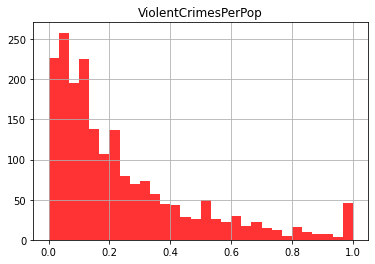

In [16]:
data.hist(column = ['ViolentCrimesPerPop'], bins = 30, color = 'red', alpha = 0.8)
plt.show()

# CORRELATIONS

In [16]:
data.corr()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
population,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,0.075596,-0.102006,...,0.172731,-0.125133,-0.123691,0.001610,-0.089638,0.713652,0.231897,0.270356,0.466352,0.367157
householdsize,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,0.295225,-0.612666,...,0.311107,-0.049253,-0.057842,-0.103109,-0.003277,-0.015078,-0.004072,-0.051506,-0.094368,-0.034923
racepctblack,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,0.134068,0.052934,...,-0.098114,0.093494,-0.045646,0.056358,-0.002894,0.149758,0.095053,0.147023,0.260793,0.631264
racePctWhite,-0.300845,-0.235907,-0.794389,1.000000,-0.270266,-0.444166,-0.194015,-0.266852,-0.183804,0.136483,...,-0.372924,0.113798,0.165285,-0.019677,0.032415,-0.131389,-0.337458,-0.215636,-0.276234,-0.684770
racePctAsian,0.181603,0.201996,-0.106738,-0.270266,1.000000,0.266743,-0.025020,0.100727,0.052761,-0.272020,...,0.657451,-0.405276,-0.189517,-0.194923,-0.198279,-0.001084,0.389944,0.296921,0.101888,0.037622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LandArea,0.713652,-0.015078,0.149758,-0.131389,-0.001084,0.011634,0.025736,0.062476,0.031632,-0.124245,...,-0.048845,-0.069273,-0.116901,-0.062989,-0.104403,1.000000,-0.170856,0.007699,0.299632,0.196800
PopDens,0.231897,-0.004072,0.095053,-0.337458,0.389944,0.370103,-0.095749,0.119725,0.045979,0.015434,...,0.614772,-0.221341,0.020701,0.118082,-0.012166,-0.170856,1.000000,0.587804,0.228084,0.281390
PctUsePubTrans,0.270356,-0.051506,0.147023,-0.215636,0.296921,0.078366,-0.173279,-0.023507,-0.040419,0.006786,...,0.401711,-0.175459,0.192367,0.081260,-0.042424,0.007699,0.587804,1.000000,0.206644,0.153829
LemasPctOfficDrugUn,0.466352,-0.094368,0.260793,-0.276234,0.101888,0.125353,0.001301,0.117290,0.083180,-0.010168,...,0.170946,-0.134230,-0.090249,0.008227,-0.107289,0.299632,0.228084,0.206644,1.000000,0.348627


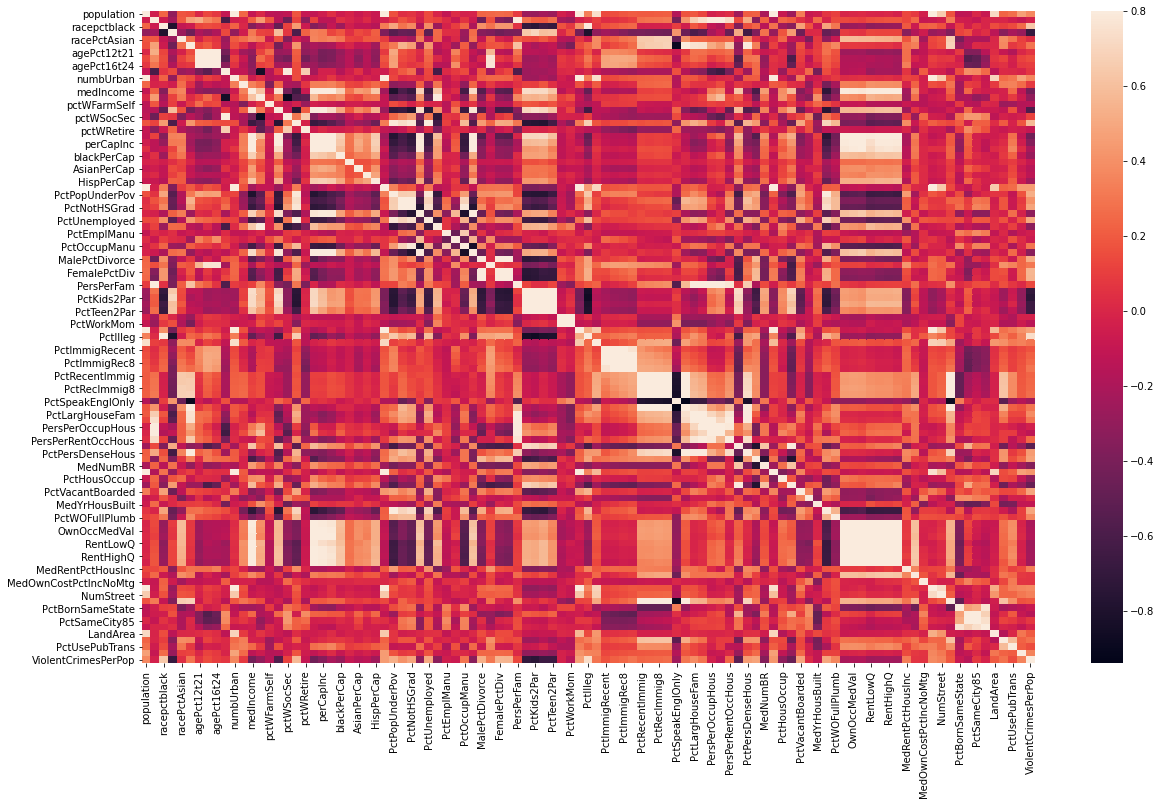

In [31]:
import seaborn as sns

corrmat = data.corr()
fig = plt.figure(figsize = (20, 12))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

In [17]:
corrT = data.corr(method = 'pearson').round(4)*100
corrT = corrT.sort_values(by=['ViolentCrimesPerPop'])
corrT['ViolentCrimesPerPop']

PctKids2Par            -73.84
PctFam2Par             -70.67
racePctWhite           -68.48
PctYoungKids2Par       -66.61
PctTeen2Par            -66.16
                        ...  
FemalePctDiv            55.60
pctWPubAsst             57.47
racepctblack            63.13
PctIlleg                73.80
ViolentCrimesPerPop    100.00
Name: ViolentCrimesPerPop, Length: 101, dtype: float64

# Principal Component Analysis (PCA)
The dataset contain many variables highly correlated. Multicolinearity will increase the model variance. Dimensionality reduction utilizing PCA can provide an optimal set of orthogonal features. 

In [18]:
X = data.iloc[:, 0:20]
y = data.iloc[:, 100]

from sklearn.model_selection import train_test_split
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

print(X.shape)
print(y.shape)

(1994, 20)
(1994,)


In [19]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
from sklearn.decomposition import PCA

import pandas as pd
pca = PCA()
df_pca = pca.fit_transform(X=X)

# Store as dataframe and print
df_pca = pd.DataFrame(df_pca)
print(df_pca.shape) 
df_pca.round(2).head()

(1994, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.42,-0.03,-0.05,0.04,0.15,-0.15,-0.01,0.27,0.02,0.07,0.04,0.08,0.06,-0.01,-0.00,-0.02,-0.02,-0.00,0.01,0.00
1,-0.33,0.19,-0.03,-0.05,0.05,0.08,-0.21,0.24,-0.43,0.04,0.01,0.15,0.00,0.03,0.02,0.00,0.01,-0.04,-0.00,-0.00
2,0.62,-0.12,-0.03,-0.29,-0.34,0.10,-0.22,-0.06,0.01,-0.06,0.33,0.24,-0.01,-0.05,-0.02,0.01,0.00,-0.01,0.00,-0.01
3,-0.20,0.72,-0.14,-0.67,-0.40,-0.08,0.04,-0.47,0.24,0.03,0.45,0.11,-0.03,0.04,0.00,-0.08,0.03,-0.00,0.01,-0.00
4,-0.44,-0.25,0.08,0.00,0.05,-0.02,-0.14,-0.12,0.09,-0.05,0.19,0.03,0.08,0.00,-0.01,-0.05,0.01,-0.01,0.01,0.00


In [21]:
from sklearn.decomposition import PCA

c = 20
pca = PCA(n_components = c)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print("Amount of variance: %s" % pca.explained_variance_)
print("Sum of the variance: %s" % sum(pca.explained_variance_).round(2))

print("Percentage of variance: %s" % pca.explained_variance_ratio_)
print("Sum of the percentage of variance: %s" % sum(pca.explained_variance_ratio_).round(2))

Amount of variance: [5.12359038e+00 4.95882397e+00 2.62841467e+00 1.62587775e+00
 1.20378839e+00 1.18446790e+00 8.46868162e-01 6.84065847e-01
 5.54410349e-01 3.90070510e-01 3.03521134e-01 1.96544729e-01
 1.05730275e-01 9.25751004e-02 4.50285141e-02 2.71561225e-02
 2.27167539e-02 1.05905724e-02 8.15475786e-03 1.95132030e-03]
Sum of the variance: 20.01
Percentage of variance: [2.55995878e-01 2.47763463e-01 1.31326525e-01 8.12356122e-02
 6.01462728e-02 5.91809411e-02 4.23130544e-02 3.41787739e-02
 2.77006461e-02 1.94895445e-02 1.51651778e-02 9.82019183e-03
 5.28272416e-03 4.62543692e-03 2.24981178e-03 1.35683279e-03
 1.13502347e-03 5.29149028e-04 4.07445608e-04 9.74960751e-05]
Sum of the percentage of variance: 1.0


In [22]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.622
Model:                             OLS   Adj. R-squared:                  0.618
Method:                  Least Squares   F-statistic:                     162.4
Date:                 Thu, 27 May 2021   Prob (F-statistic):               0.00
Time:                         18:00:09   Log-Likelihood:                 1046.1
No. Observations:                 1994   AIC:                            -2050.
Df Residuals:                     1973   BIC:                            -1933.
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8234      0.108 

In [ ]:
 OLS result shows P-value of some variables have more than 0.05
(significance level) so to get rid of those value we need to apply back elimination


In [23]:
#backward feature elimination
while (lr.pvalues.max()>0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True)
    ols = sm.OLS(y,X2)
    lr = ols.fit()
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.621
Model:                             OLS   Adj. R-squared:                  0.618
Method:                  Least Squares   F-statistic:                     249.5
Date:                 Thu, 27 May 2021   Prob (F-statistic):               0.00
Time:                         18:00:14   Log-Likelihood:                 1043.2
No. Observations:                 1994   AIC:                            -2058.
Df Residuals:                     1980   BIC:                            -1980.
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8443      0.083    

In [24]:
#For cross-validation using train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=1,test_size=0.2)

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5740599054303881

In [26]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import math

print(r2_score(y_test,y_pred)) #r2
print(mean_squared_error(y_test,y_pred)) # mse
print(math.sqrt(mean_squared_error(y_test,y_pred)))#rmse

0.5740599054303881
0.021798169330980045
0.14764203104461834


In [27]:
#k-fold cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=5).mean()

0.608291900056981

In [28]:
#dimensions of data
n = len(X_test)
k = len(X_test)
R2 = r2_score(y_test,y_pred)
R2

0.5740599054303881

In [29]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring

Adj_R2 = 1 - ((n-1)*(1- R2)/(n-k-1))
print(Adj_R2)

170.52415763870553


In [30]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [31]:
model.intercept_

0.8234174390544429

In [32]:
model.coef_

array([ 0.71315148, -0.07585026,  0.30319919, -0.11656156, -0.00794224,
        0.13324176, -0.322304  , -0.36318556,  0.52581244,  0.00804374,
       -0.47824682,  0.07388175,  0.19747783, -0.35330084, -0.01354118,
       -0.30226887, -0.23019036,  0.09688083, -0.09760119, -0.15109376])

In [33]:
#import the knn model
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [34]:
#see the cross_validated score for cv=5
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X_train,y_train,cv=5).mean()



0.5853294259387867

In [35]:
#for no.of neighbors from 1 - 10, graph the k-fold scores
scores = []
for i in range(1,11,1):
    knn = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    scores.append(cross_val_score(knn,X,y,cv=3).mean())

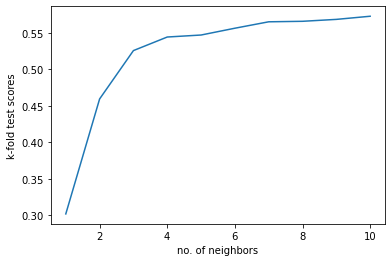

In [36]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),scores)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()

# 4 KNN IS THE BEST MODEL


In [37]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=4)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN K-Nearest Neighbor(KNN)


KNeighborsRegressor(n_neighbors=4)
R2 Value: 0.7620638540162159


In [38]:
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10,)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),4))


Accuracy values for 10-fold Cross Validation:
 [0.52259511 0.47916502 0.56463292 0.51243197 0.62812233 0.63213585
 0.63619532 0.53921097 0.5263618  0.50642523]

Final Average Accuracy of the model: 0.5547


# SVR MODEL

In [39]:
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale


In [40]:
from sklearn.svm import LinearSVR, NuSVR, OneClassSVM


linear_svr = LinearSVR(max_iter=1000000)
linear_svr.fit(X_train, y_train)

LinearSVR(max_iter=1000000)

In [41]:
Y_preds = linear_svr.predict(X_test)

print(Y_preds[:20])
print(y_test[:20])

print('Test R^2 Score : %.3f'%linear_svr.score(X_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training R^2 Score : %.3f'%linear_svr.score(X_train, y_train))

[0.04935113 0.16911705 0.20653792 0.01499192 0.22338035 0.07556967
 0.21224535 0.14441332 0.33231831 0.39346426 0.34655867 0.0318587
 0.18088078 0.16266399 0.08289046 0.11944457 0.09996559 0.26405011
 0.04498364 0.37070482]
1746    0.06
1556    0.37
56      0.22
1740    0.01
913     0.16
1781    0.08
613     0.10
414     0.10
1290    0.28
804     0.28
906     0.46
1179    0.03
321     0.09
120     0.22
1824    0.05
547     0.18
1342    0.02
1676    0.28
1986    0.02
1301    0.40
Name: ViolentCrimesPerPop, dtype: float64
Test R^2 Score : 0.567
Training R^2 Score : 0.611


In [42]:
print( linear_svr.coef_)

[ 0.41852215 -0.01317429  0.32988806 -0.111695   -0.02717012  0.13295913
 -0.17753895 -0.2533199   0.32577969  0.04497619 -0.12274738  0.03425843
  0.07535018 -0.19141163 -0.00407079 -0.2080614  -0.15383214  0.13162464
 -0.05602158 -0.04127631]


In [43]:
print("Model Intercept :", linear_svr.intercept_)

Model Intercept : [0.52172149]


In [44]:
linear_svr.fit(X_train, y_train)

score = linear_svr.score(X_train, y_train)
print(score)

0.6118767551291114


In [45]:
cv_score = cross_val_score(linear_svr, X, y, cv = 10)
print("CV mean score: ", cv_score.mean())

CV mean score:  0.5935707885917879


In [46]:
ypred = linear_svr.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  0.02212645928850996
RMSE:  0.01106322964425498


In [47]:
score = linear_svr.score(X_train, y_train)
print("R-squared:", score)

R-squared: 0.6118767551291114


# ADABOOST 

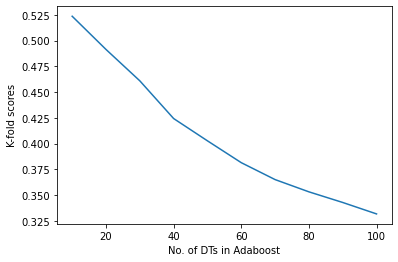

In [48]:
from sklearn.ensemble import AdaBoostRegressor


#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
scores = []
for i in range(10,110,10):
    scores.append(cross_val_score(AdaBoostRegressor(n_estimators=i,random_state=0),
                                  X,y,cv=10).mean())
plt.plot(range(10,110,10),scores)
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.show()

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_validate
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [70,80,90,100],
            'base_estimator': [DecisionTreeRegressor(max_depth=12,random_state=0),
                               DecisionTreeRegressor(max_depth=13,random_state=0),
                               DecisionTreeRegressor(max_depth=14,random_state=0)]
        }
model = GridSearchCV(AdaBoostRegressor(random_state=0), params,cv=10)
model.fit(X,y)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=0),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=12,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=13,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=14,
                                                                  random_state=0)],
                         'n_estimators': [70, 80, 90, 100]})

In [50]:
model.best_params_

{'base_estimator': DecisionTreeRegressor(max_depth=14, random_state=0),
 'n_estimators': 70}

In [51]:
model.best_score_

0.6181138495367315

# RAMDOMFOREST 

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [53]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(RandomForestRegressor(n_estimators=i,random_state=9),
                                  X,y,cv=4).mean())

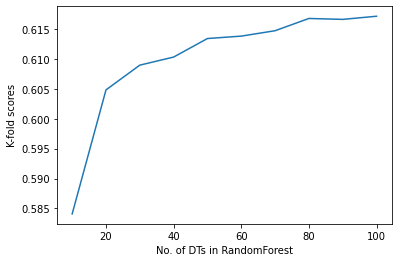

In [54]:
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

In [55]:
params = {
            'n_estimators': [100,110,120,130],
            'max_depth': [13,14,15]
        }
model = GridSearchCV(RandomForestRegressor(), params,cv=10)
model.fit(X,y)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [13, 14, 15],
                         'n_estimators': [100, 110, 120, 130]})

In [56]:
model.best_params_

{'max_depth': 15, 'n_estimators': 110}

In [57]:
model.best_score_

0.6222101146824937

In [58]:
best_model = model.best_estimator_

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5)

In [60]:
best_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, n_estimators=110)

In [61]:
best_model.score(X_test,y_test)

0.5843714261275403

In [27]:
#set environment
import os
import sys
 
os.environ["SPARK_HOME"] = "/usr/hdp/current/spark2-client"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
# In below two lines, use /usr/bin/python2.7 if you want to use Python 2
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 

os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.4-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

In [28]:
#import Sparksession driver
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Classification of cummities crime  Dataset") \
    .getOrCreate()

In [29]:
from pyspark.ml.regression import LinearRegression

In [30]:
df = spark.read.csv('crimedata.csv',inferSchema=True,header=None)

In [31]:
df.show(5)

+---+---+-----+-------------------+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|_c0|_c1|  _c2|                _c3|_c4| _c5| _c6| _c7| _c8| _c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_c30|_c31|_c32|_c33|_c34|_c35|_c36|_c37|_c38|_c39|_c40|_c41|_c42|_c43|_c44|_c45|_c46|_c47|_c48|_c49|_c50|_c51|_c52|_c53|_c54|_c55|_c56|_c57|_c58|_c59|_c6

In [32]:
df.columns

['_c0',
 '_c1',
 '_c2',
 '_c3',
 '_c4',
 '_c5',
 '_c6',
 '_c7',
 '_c8',
 '_c9',
 '_c10',
 '_c11',
 '_c12',
 '_c13',
 '_c14',
 '_c15',
 '_c16',
 '_c17',
 '_c18',
 '_c19',
 '_c20',
 '_c21',
 '_c22',
 '_c23',
 '_c24',
 '_c25',
 '_c26',
 '_c27',
 '_c28',
 '_c29',
 '_c30',
 '_c31',
 '_c32',
 '_c33',
 '_c34',
 '_c35',
 '_c36',
 '_c37',
 '_c38',
 '_c39',
 '_c40',
 '_c41',
 '_c42',
 '_c43',
 '_c44',
 '_c45',
 '_c46',
 '_c47',
 '_c48',
 '_c49',
 '_c50',
 '_c51',
 '_c52',
 '_c53',
 '_c54',
 '_c55',
 '_c56',
 '_c57',
 '_c58',
 '_c59',
 '_c60',
 '_c61',
 '_c62',
 '_c63',
 '_c64',
 '_c65',
 '_c66',
 '_c67',
 '_c68',
 '_c69',
 '_c70',
 '_c71',
 '_c72',
 '_c73',
 '_c74',
 '_c75',
 '_c76',
 '_c77',
 '_c78',
 '_c79',
 '_c80',
 '_c81',
 '_c82',
 '_c83',
 '_c84',
 '_c85',
 '_c86',
 '_c87',
 '_c88',
 '_c89',
 '_c90',
 '_c91',
 '_c92',
 '_c93',
 '_c94',
 '_c95',
 '_c96',
 '_c97',
 '_c98',
 '_c99',
 '_c100',
 '_c101',
 '_c102',
 '_c103',
 '_c104',
 '_c105',
 '_c106',
 '_c107',
 '_c108',
 '_c109',
 '_c110',


In [35]:
df = df.toDF('state',"county","community","communityname","fold","population","householdsize","racepctblack","racePctWhite","racePctAsian",
                                       "racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome",
                                       "pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc",
                                       "perCapInc","whitePerCap","blackPerCap","indianPerCap","AsianPerCap","OtherPerCap","HispPerCap",
                                       "NumUnderPov","PctPopUnderPov","PctLess9thGrade","PctNotHSGrad","PctBSorMore","PctUnemployed",
                                       "PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf","MalePctDivorce", 
                                       "MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par", 
                                       "PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg", 
                                       "NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig",
                                       "PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly","PctNotSpeakEnglWell",
                                       "PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous",
                                       "PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup",
                                       "PctHousOwnOcc","PctVacantBoarded","PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone",
                                       "PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian",
                                       "RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters",  
                                       "NumStreet","PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85",
                                       "LemasSwornFT","LemasSwFTPerPop","LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq",  
                                       "LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop","RacialMatchCommPol","PctPolicWhite",  
                                       "PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits",
                                       "NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars",  
                                       "PolicOperBudg","LemasPctPolicOnPatr","LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop")

In [36]:
#Check for missing values
for col in df.columns:
    print("no. of cells in column", col, "with null values:", df.filter(df[col].isNull()).count())

no. of cells in column state with null values: 0
no. of cells in column county with null values: 0
no. of cells in column community with null values: 0
no. of cells in column communityname with null values: 0
no. of cells in column fold with null values: 0
no. of cells in column population with null values: 0
no. of cells in column householdsize with null values: 0
no. of cells in column racepctblack with null values: 0
no. of cells in column racePctWhite with null values: 0
no. of cells in column racePctAsian with null values: 0
no. of cells in column racePctHisp with null values: 0
no. of cells in column agePct12t21 with null values: 0
no. of cells in column agePct12t29 with null values: 0
no. of cells in column agePct16t24 with null values: 0
no. of cells in column agePct65up with null values: 0
no. of cells in column numbUrban with null values: 0
no. of cells in column pctUrban with null values: 0
no. of cells in column medIncome with null values: 0
no. of cells in column pctWWage 

In [7]:
df.printSchema()

root
 |-- state  : integer (nullable = true)
 |-- county  : string (nullable = true)
 |-- community  : string (nullable = true)
 |-- communityname: string (nullable = true)
 |-- fold  : integer (nullable = true)
 |-- population  : double (nullable = true)
 |-- householdsize  : double (nullable = true)
 |-- racepctblack  : double (nullable = true)
 |-- racePctWhite  : double (nullable = true)
 |-- racePctAsian  : double (nullable = true)
 |-- racePctHisp  : double (nullable = true)
 |-- agePct12t21  : double (nullable = true)
 |-- agePct12t29  : double (nullable = true)
 |-- agePct16t24  : double (nullable = true)
 |-- agePct65up  : double (nullable = true)
 |-- numbUrban  : double (nullable = true)
 |-- pctUrban  : double (nullable = true)
 |-- medIncome  : double (nullable = true)
 |-- pctWWage  : double (nullable = true)
 |-- pctWFarmSelf  : double (nullable = true)
 |-- pctWInvInc  : double (nullable = true)
 |-- pctWSocSec  : double (nullable = true)
 |-- pctWPubAsst  : double (nul

In [37]:
#Label encoder
from pyspark.ml.feature import StringIndexer
indexed = df
for col in df.columns:
    stringIndexer = StringIndexer(inputCol=col, outputCol=col+"_encoded")
    indexed = stringIndexer.fit(indexed).transform(indexed)
indexed.show()

+-----+------+---------+--------------------+----+----------+-------------+------------+------------+------------+-----------+-----------+-----------+-----------+----------+---------+--------+---------+--------+------------+----------+----------+-----------+----------+---------+---------+-----------+-----------+------------+-----------+-----------+----------+-----------+--------------+---------------+------------+-----------+-------------+---------+-----------+---------------+------------+----------------+--------------+--------------+------------+-----------+----------+----------+-----------+----------------+-----------+-------------------+----------+--------+--------+--------+--------------+------------+------------+-------------+--------------+------------+------------+-------------+----------------+-------------------+---------------+-----------------+----------------+-----------------+------------------+---------------+----------------+--------------+--------+----------+----------

In [38]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=["population","householdsize","racepctblack","racePctWhite","racePctAsian",
                                      "racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome",
                                      "pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc",
                                       "NumUnderPov","PctPopUnderPov","PctLess9thGrade","PctNotHSGrad","PctBSorMore","PctUnemployed",
                                      "PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf","MalePctDivorce",
                                      "MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par", 
                                       "PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg", 
                                       "NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig",
                                      "PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly","PctNotSpeakEnglWell",
                                       "PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous",
                                       "PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup",
                                       "PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian",
                                       "RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters",  
                                       "NumStreet","PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85",
                                       ],             
                            outputCol="features")
feature_vec=assembler.transform(indexed)
feature_vec.select("features").show(5)

+--------------------+
|            features|
+--------------------+
|[0.19,0.33,0.02,0...|
|[0.0,0.16,0.12,0....|
|[0.0,0.42,0.49,0....|
|[0.04,0.77,1.0,0....|
|[0.01,0.55,0.02,0...|
+--------------------+
only showing top 5 rows



In [41]:
# Split the data into train and test sets
train_data, test_data = feature_vec.randomSplit([.75,.25],seed=0)

In [43]:
from pyspark.ml.regression import LinearRegression
# Create initial LinearRegression model
lr = LinearRegression(labelCol="ViolentCrimesPerPop", featuresCol="features", 
 regParam=0.0001, 
elasticNetParam=0.0)
# Train model with Training Data
lrModel = lr.fit(train_data)
print(lrModel.intercept,lrModel.coefficients)

0.32357142769840747 [0.3081051859141622,0.003829961225165581,0.2280776660575105,0.07376422289856018,0.010786676563683404,0.08955697567185526,0.09796663289592407,-0.18181862504776422,-0.13360849644641182,0.05977172279372951,-0.34942471111754964,0.05391541310829473,-0.07349288783952752,-0.1797519767735682,0.05541226252031406,-0.1561351612180503,0.05001881531622912,-0.004650508833794684,-0.06705884838728073,-0.10850635277941952,-0.09097834977773489,-0.15358755441856622,-0.1296545602500852,0.08847586922088242,0.08669051301478067,0.02941414649384259,0.2126585420278939,-0.0515389934172126,-0.028821375564630373,0.06853832994666513,0.09138503245673031,0.4199981875593981,0.21176647183328842,0.045896896844587906,-0.42002402844388925,-0.055008626547179994,-0.015385140462660327,-0.34134784207421476,-0.046265498448326614,0.06253552135253432,0.047718140127394774,-0.16391475110360237,-0.10567233690696774,0.1671897667621964,-0.1639251731298556,0.04726838287896496,-0.03732702414267312,-0.02159294082004

In [44]:
predictions = lrModel.transform(test_data)
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="ViolentCrimesPerPop",metricName='r2')
evaluator.evaluate(predictions)

0.6506757922695572

In [47]:
#Grid Search
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()\
             .addGrid(lr.regParam,[0.001,0.01,0.1,1])\
             .addGrid(lr.elasticNetParam,[0.0,0.5,1.0])\
             .build())

# Create 4-fold CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=4)

cvModel = cv.fit(train_data)


In [48]:
list(zip(cvModel.avgMetrics, cvModel.getEstimatorParamMaps()))

[(0.648595020986638,
  {Param(parent='LinearRegression_4eee9b583f5430db00d2', name='regParam', doc='regularization parameter (>= 0).'): 0.001,
   Param(parent='LinearRegression_4eee9b583f5430db00d2', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0}),
 (0.6486600625404435,
  {Param(parent='LinearRegression_4eee9b583f5430db00d2', name='regParam', doc='regularization parameter (>= 0).'): 0.001,
   Param(parent='LinearRegression_4eee9b583f5430db00d2', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.5}),
 (0.6492411917641094,
  {Param(parent='LinearRegression_4eee9b583f5430db00d2', name='regParam', doc='regularization parameter (>= 0).'): 0.001,
   Param(parent='LinearRegression_4eee9b583f5430db00d2', name='elasticNetParam', doc='the ElasticNet mixing paramet

In [51]:
#Best Model Params
score_params_list = list(zip(cvModel.avgMetrics, cvModel.getEstimatorParamMaps()))
max(score_params_list,key=lambda item:item[0])

(0.650017525606133,
 {Param(parent='LinearRegression_4eee9b583f5430db00d2', name='regParam', doc='regularization parameter (>= 0).'): 0.01,
  Param(parent='LinearRegression_4eee9b583f5430db00d2', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0})

In [52]:
model = LinearRegression(labelCol="ViolentCrimesPerPop",featuresCol="features",
 regParam=0.01,
elasticNetParam=0.0)
lrModel = model.fit(train_data)
print(lrModel.intercept,lrModel.coefficients)
#Evaluation of the Model
predictions = lrModel.transform(test_data)
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="ViolentCrimesPerPop",metricName='r2')
evaluator.evaluate(predictions)

0.4382483166854913 [-0.007954849124808875,0.034842675651947035,0.1518583347709552,-0.039700486232883525,-0.01241537340980726,0.03587819985263252,0.011234884023634317,-0.13413973009052327,-0.023596893575041092,0.03733001563806814,-0.03866351266608238,0.04018390579741587,0.016903890849566405,-0.06840957222881411,0.0369865519575348,-0.1253631905276624,0.03004407074193142,0.006384190734395918,-0.06586524298640582,-0.03409739988772097,-0.03147245337796149,-0.08377805534349955,-0.06936656129932736,0.030079577904590142,0.005487620418190879,-0.0017369331304282623,0.07889387324734329,-0.032845491374890005,-0.010323749046846364,0.029842502223395077,0.031071992896838777,0.1289210396399334,0.0944665014391481,-0.060624302259453866,-0.001793798912241059,0.06505069240623493,-0.08611716885109848,-0.14987186074366435,-0.07785013480470779,0.018252918275120954,0.02276208322768165,-0.11712592360981831,-0.056436030119908207,0.18233060815469457,-0.1267034842208261,0.02702198871022737,-0.03860050567942048,-0

0.6620025187931192

In [ ]:
conclusion-

 in the linear regression analysis explains only 35% variation in the response variable "ViolentCrimesPerPop".

The linear regression model developed will be incomplete without considering the other 120+ explanatory variables available in the dataset. We would also like to see what other variables has had 
significant effect on violent and non-violent crime rates

Given below is the score of all the models and i found randomforest is the best model among all    


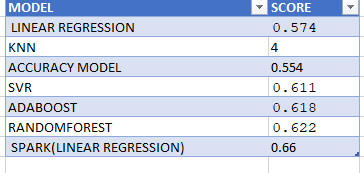





